In [3]:
#Defining the folder of the train dataset and creating a list of two categories and using the same categories we define the 
#path to source the images as you can see below.
#Using load_img() function from the keras preprocessing library and setting the color mode to gray scale
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import os 
import cv2
import matplotlib.pyplot as plt
train='F:/IMP.DATA/Task/Watermark_train_data'
test='F:/IMP.DATA/Task/Watermark_test_data'

CATEGORIES=['Watermark','No Watermark']
IMG_SIZE=600
for category in CATEGORIES:
    trainpath = os.path.join(train, category)  # directory with our training  pictures
    for img in os.listdir(trainpath):
        trainer = load_img(os.path.join(trainpath,img),color_mode="grayscale")
        train_array= img_to_array(trainer)
        new_train_array = cv2.resize(train_array,(IMG_SIZE,IMG_SIZE))
                        
        
print(new_train_array)

[[208.      208.16553 208.18916 ... 202.      201.875   201.     ]
 [208.5675  208.94594 209.      ... 202.      201.875   201.     ]
 [209.      209.      209.      ... 201.05417 201.0474  201.     ]
 ...
 [ 73.94583  74.82083  74.23993 ... 152.98871 152.94583 152.94583]
 [ 73.       73.875    74.44927 ... 152.44928 152.      152.     ]
 [ 73.       73.875    74.      ... 152.      152.      152.     ]]


In [4]:
#Defining the folder of the test dataset and creating a list of two categories and using the same categories we define the 
#path to source the images as you can see below.

for category in CATEGORIES:
    testpath = os.path.join(test, category)  # directory with our testing pictures
    for img in os.listdir(testpath):
        tester = load_img(os.path.join(testpath,img),color_mode="grayscale")
        test_array= img_to_array(tester)
        new_test_array = cv2.resize(test_array,(IMG_SIZE,IMG_SIZE))
print(new_test_array)                

[[61.       61.       61.       ... 72.5      72.       72.      ]
 [61.       61.       61.       ... 72.65     72.090004 72.      ]
 [61.       61.       61.       ... 73.       72.65     72.5     ]
 ...
 [65.9      64.4      62.5      ... 65.5      63.800003 64.85    ]
 [65.9      64.4      62.5      ... 63.95     62.88     66.329994]
 [65.9      64.4      62.5      ... 63.05     62.7      66.6     ]]


<function matplotlib.pyplot.show(*args, **kw)>

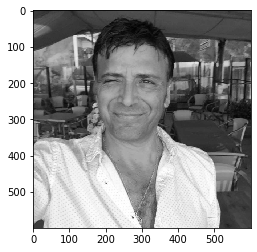

In [47]:
#Resizing Images using cv2.resize
IMG_SIZE=600
test_array= img_to_array(tester)
                
new_test_array = cv2.resize(test_array,(IMG_SIZE,IMG_SIZE))
plt.imshow( new_test_array, cmap='gray')
plt.show

In [5]:
#Creating a training data list and creating a function to append the list with new array of resized image arrays with a 
#defined IMG_SIZE.Using img_to_array to convert the images to array and filter out any files which are not images with the
#try and except conditional formatiing
from keras.preprocessing.image import img_to_array
import numpy as np

training_data =[]
IMG_SIZE=600
def create_training_data():
    for category in CATEGORIES:
        trainpath = os.path.join(train,category)
        classnum = CATEGORIES.index(category)
        for img in os.listdir(trainpath):
            try:
                trainer = load_img(os.path.join(trainpath,img),color_mode="grayscale")
                train_array= img_to_array(trainer)
                new_train_array = cv2.resize(train_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_train_array,classnum])
            except Exception as e:
                pass
        


create_training_data()

#Figuring out if the images have been properly loaded or not
print(len(training_data))




143


In [6]:
#Creating a testing data list and creating a function to append the list with new array of resized image arrays with a 
#defined IMG_SIZE.Using img_to_array to convert the images to array and filter out any files which are not images with the
#try and except conditional formatiing
from keras.preprocessing.image import img_to_array
import numpy as np

testing_data =[]
IMG_SIZE=600
def create_testing_data():
    for category in CATEGORIES:
        testpath = os.path.join(test,category)
        classnum = CATEGORIES.index(category)
        for img in os.listdir(testpath):
            try:
                tester = load_img(os.path.join(testpath,img),color_mode="grayscale")
                test_array= img_to_array(tester)
                new_test_array = cv2.resize(test_array,(IMG_SIZE,IMG_SIZE))
                testing_data.append([new_test_array,classnum])
            except Exception as e:
                pass
        


create_testing_data()
#Figuring out if the images have been properly loaded or not

print(len(testing_data))




132


In [18]:
#Shuffling the assignment of class numbers with the images
import random
random.shuffle(training_data)
for sample in training_data:
    print(sample[1])

0
0
0
1
0
1
1
1
0
0
0
0
1
0
1
0
1
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
1
0
0
1
0
1
1
1
1
1
1
0
1
1
0
0
0
1
0
1
0
0
1
1
1
1
1
0
0
0
1
0
1
0
1
1
0
1
1
1
0
0
0
0
1
0
1
1
0
1
1
1
0
0
0
0
0
1
1
0
0
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
0
0
1
0
0
1
0
1
1
0
1
1
0
0
1
0
1
1
1
1
1
0
1
0
1
1
0
1
1
0
0
1


In [27]:
#creating a numpy array of the training and testing images and labels list by appending and converting the data type later 

train_images=[]
train_labels=[]
test_images=[]
test_labels=[]

for features , label in training_data:
    train_images.append(features)
    train_labels.append(label)
    
train_images=np.array(train_images).reshape(-1, IMG_SIZE,IMG_SIZE,1)
train_labels=np.array(train_labels)

for features , label in testing_data:
    test_images.append(features)
    test_labels.append(label)
    
test_images=np.array(test_images).reshape(-1, IMG_SIZE,IMG_SIZE,1)
test_labels=np.array(test_labels)

print(len(train_images))

print(len(test_images))

143
132


In [25]:
#Using pickle to supply train and test data to use data with other model 
import pickle
pickle_out=open('images.pickle','wb')
pickle.dump(test_images,pickle_out)
pickle_out.close()

pickle_out=open('labels.pickle','wb')
pickle.dump(test_labels,pickle_out)
pickle_out.close()


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
IMG_SIZE=600
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE ,1)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_images,train_labels, batch_size=2,epochs=5,validation_data=(test_images, test_labels))

Train on 143 samples, validate on 132 samples
Epoch 1/5
143/143 [==============================] - 109s 759ms/sample - loss: 588.6567 - accuracy: 0.5105 - val_loss: 0.8439 - val_accuracy: 0.4773
Epoch 2/5
143/143 [==============================] - 109s 764ms/sample - loss: 0.7327 - accuracy: 0.6224 - val_loss: 0.8106 - val_accuracy: 0.4924
Epoch 3/5
143/143 [==============================] - 105s 737ms/sample - loss: 0.5263 - accuracy: 0.7413 - val_loss: 0.8087 - val_accuracy: 0.4924
Epoch 4/5
143/143 [==============================] - 105s 735ms/sample - loss: 0.4397 - accuracy: 0.8182 - val_loss: 0.8585 - val_accuracy: 0.4924
Epoch 5/5
143/143 [==============================] - 106s 739ms/sample - loss: 0.3491 - accuracy: 0.8322 - val_loss: 0.8887 - val_accuracy: 0.4924


In [40]:
prediction=model.predict([test_images])
print((prediction[0][0]))
print((prediction[1][0]))
print((prediction[2][0]))
print((prediction[3][0]))

0.44644833
0.38493907
0.58677065
0.7090465
